# Sales Data Analysis

## Objective
The objective of this project is to analyze the sales data to identify trends, seasonal effects, and key performance indicators (KPIs).

## Dataset Description
The dataset used for this analysis includes sales data with the following columns:
- `Row ID`
- `Order ID`
- `Order Date`
- `Ship Date`
- `Ship Mode`
- `Customer ID`
- `Customer Name`
- `Segment`
- `Country`
- `City`
- `State`
- `Postal Code`
- `Region`
- `Product ID`
- `Category`
- `Sub-Category`
- `Product Name`
- `Sales`


## Installation and Setup

In [36]:
import os
import numpy as np
import zipfile
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [37]:
!kaggle datasets download -d rohitsahoo/sales-forecasting

Dataset URL: https://www.kaggle.com/datasets/rohitsahoo/sales-forecasting
License(s): GPL-2.0
100%|████████████████████████████████████████| 480k/480k [00:00<00:00, 1.79MB/s]
100%|████████████████████████████████████████| 480k/480k [00:00<00:00, 1.79MB/s]


In [38]:
def unzip_file(zip_file):

    extract_to = os.path.dirname(os.path.abspath(zip_file))
    
    with zipfile.ZipFile(zip_file, 'r') as zip_ref:
        zip_ref.extractall(extract_to)
    
    os.remove(zip_file)
    
unzip_file("sales-forecasting.zip")

In [39]:
data = pd.read_csv("train.csv")
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


## Data Exploration and Cleaning



In [44]:
# We can drop the "Row ID"
data.drop(columns=["Row ID", "Country"], inplace=True)

In [46]:
# Check for missing values
data.isnull().sum()

Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [47]:
# Drop rows with missing values
data.dropna(inplace=True)

In [48]:
# Check for datatype
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9789 entries, 0 to 9799
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9789 non-null   object 
 1   Order Date     9789 non-null   object 
 2   Ship Date      9789 non-null   object 
 3   Ship Mode      9789 non-null   object 
 4   Customer ID    9789 non-null   object 
 5   Customer Name  9789 non-null   object 
 6   Segment        9789 non-null   object 
 7   City           9789 non-null   object 
 8   State          9789 non-null   object 
 9   Postal Code    9789 non-null   float64
 10  Region         9789 non-null   object 
 11  Product ID     9789 non-null   object 
 12  Category       9789 non-null   object 
 13  Sub-Category   9789 non-null   object 
 14  Product Name   9789 non-null   object 
 15  Sales          9789 non-null   float64
dtypes: float64(2), object(14)
memory usage: 1.3+ MB


In [49]:
data.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [50]:
# Change the date from object to datetime
data['Order Date'] = pd.to_datetime(data['Order Date'], format='%d/%m/%Y')
data['Ship Date'] = pd.to_datetime(data['Ship Date'], format='%d/%m/%Y')


# Change Postal Code from float64 to string
data['Postal Code'] = data['Postal Code'].astype(str)

In [51]:
# Extract month and year
data['Month'] = data['Order Date'].dt.month
data['Year'] = data['Order Date'].dt.year

# Aggregate monthly sales
monthly_sales = data.groupby(['Year', 'Month']).agg({'Sales': 'sum'}).reset_index()


In [52]:
monthly_sales.head()

,Year,Month,Sales
0,2015,1,14205.707
1,2015,2,4519.892
2,2015,3,55205.797
3,2015,4,27906.855
4,2015,5,23644.303


In [53]:
# Check for duplicates
data[data.duplicated(keep=False)]

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Month,Year
3405,US-2015-150119,2015-04-23,2015-04-27,Standard Class,LB-16795,Laurel Beltran,Home Office,Columbus,Ohio,43229.0,East,FUR-CH-10002965,Furniture,Chairs,Global Leather Highback Executive Chair with P...,281.372,4,2015
3406,US-2015-150119,2015-04-23,2015-04-27,Standard Class,LB-16795,Laurel Beltran,Home Office,Columbus,Ohio,43229.0,East,FUR-CH-10002965,Furniture,Chairs,Global Leather Highback Executive Chair with P...,281.372,4,2015


In [54]:
# Drop duplicate rows and reset index
data.drop_duplicates(inplace=True)
data.reset_index(drop=True, inplace=True)

In [55]:
# Check consistency of Customer ID and Customer Name
customer_consistency = data[['Customer ID', 'Customer Name']].drop_duplicates()

# Check for inconsistencies
inconsistent_customers = customer_consistency.groupby('Customer ID').filter(lambda x: len(x) > 1)

# Display inconsistent customers if any
print("Inconsistent Customer IDs and Names:")
print(inconsistent_customers)

# If no inconsistencies are found
if inconsistent_customers.empty:
    print("All Customer IDs and Customer Names are consistent.")
else:
    print(f"Inconsistencies found in {len(inconsistent_customers)} records.")


Inconsistent Customer IDs and Names:
Empty DataFrame
Columns: [Customer ID, Customer Name]
Index: []
All Customer IDs and Customer Names are consistent.


In [56]:
data.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Month,Year
0,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,11,2017
1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,11,2017
2,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,6,2017
3,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,10,2016
4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,10,2016


In [57]:
# Export cleaned data for Tableau
data.to_csv('cleaned_sales_data.csv', index=False)

## Exploratory Data Analysis (EDA)


### Sales Trends Over Time

- **Visualize overall sales trends over time.**
- **Analyze sales by year, month, and day.**


In [58]:
monthly_sales.head()

,Year,Month,Sales
0,2015,1,14205.707
1,2015,2,4519.892
2,2015,3,55205.797
3,2015,4,27906.855
4,2015,5,23644.303


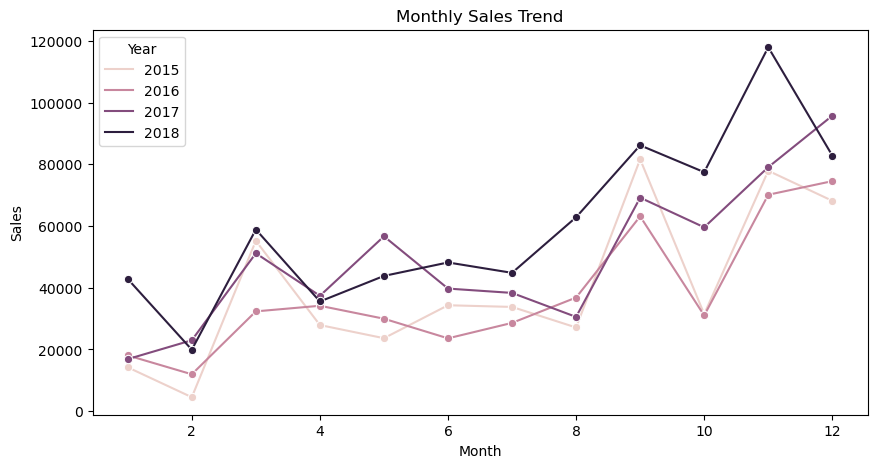

In [59]:
# Sales trend over time
plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_sales, x='Month', y='Sales', hue='Year', marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.legend(title='Year')
plt.show()

### Top Selling Products, Categories and Sub-Categories

- Identify top-selling products and their categories.



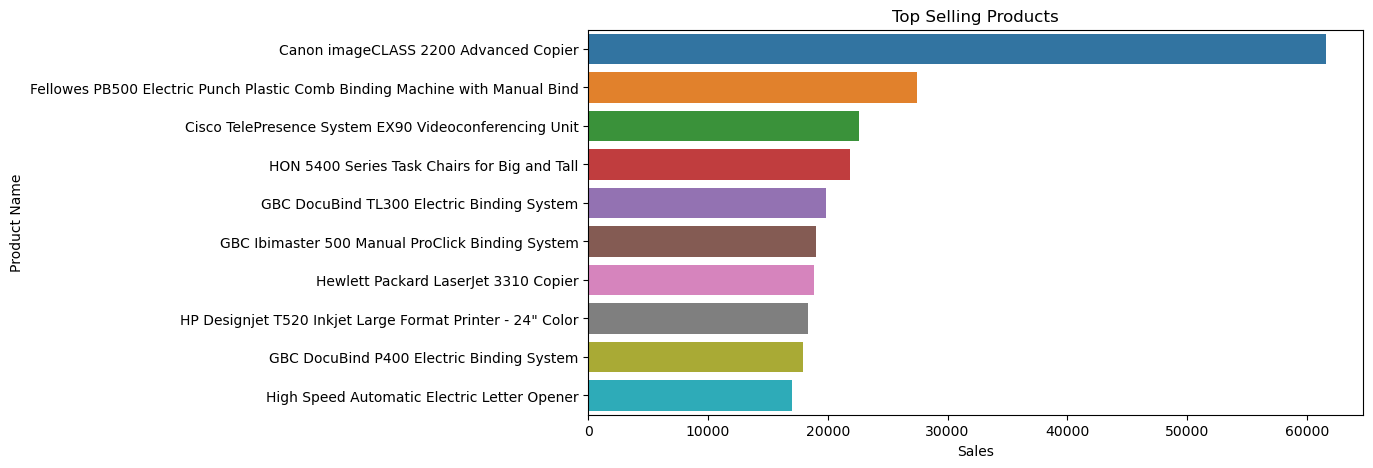

In [60]:
# Top selling products
top_products = data.groupby('Product Name').agg({'Sales': 'sum'}).sort_values(by='Sales', ascending=False).head(10).reset_index()
plt.figure(figsize=(10, 5))
sns.barplot(data=top_products, x='Sales', y='Product Name')
plt.title('Top Selling Products')
plt.show()

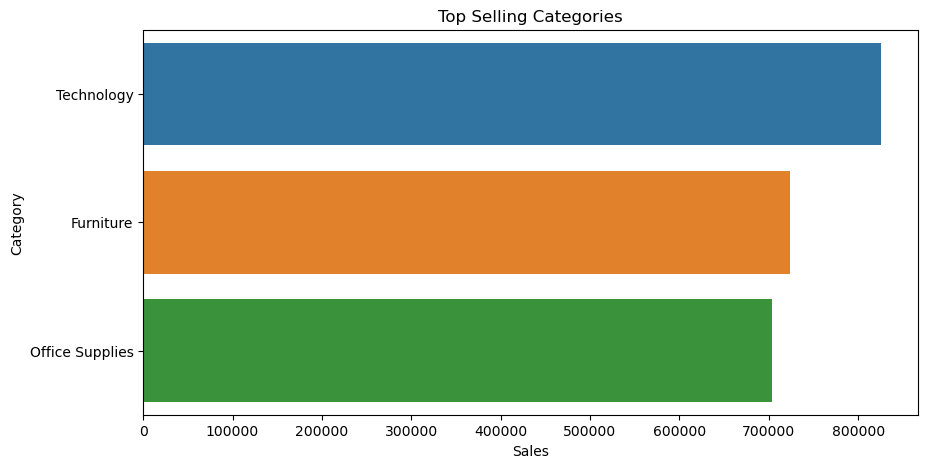

In [61]:
# Top selling subcategories
top_categories = data.groupby('Category').agg({'Sales': 'sum'}).sort_values(by='Sales', ascending=False).reset_index()
plt.figure(figsize=(10, 5))
sns.barplot(data=top_categories, x='Sales', y='Category')
plt.title('Top Selling Categories')
plt.show()

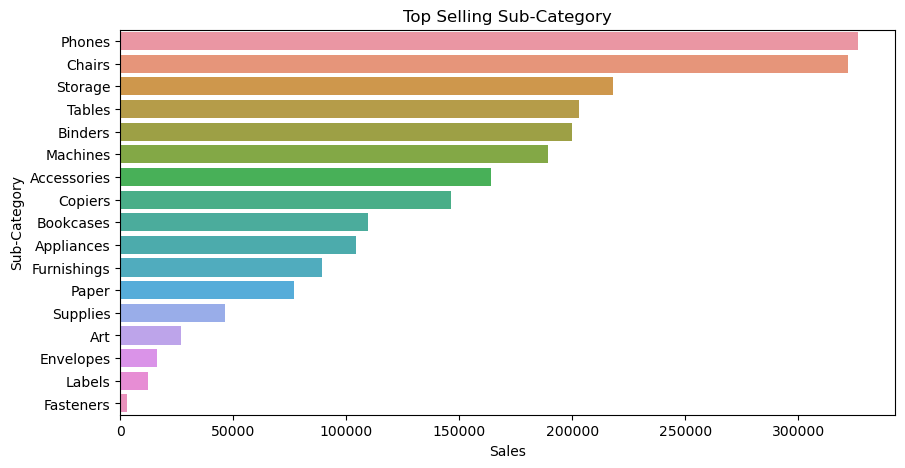

In [62]:
# Top selling sub-categories
top_subcategories = data.groupby('Sub-Category').agg({'Sales': 'sum'}).sort_values(by='Sales', ascending=False).reset_index()
plt.figure(figsize=(10, 5))
sns.barplot(data=top_subcategories, x='Sales', y='Sub-Category')
plt.title('Top Selling Sub-Category')
plt.show()

### Customer Insights

- Analyze customer purchase behavior.

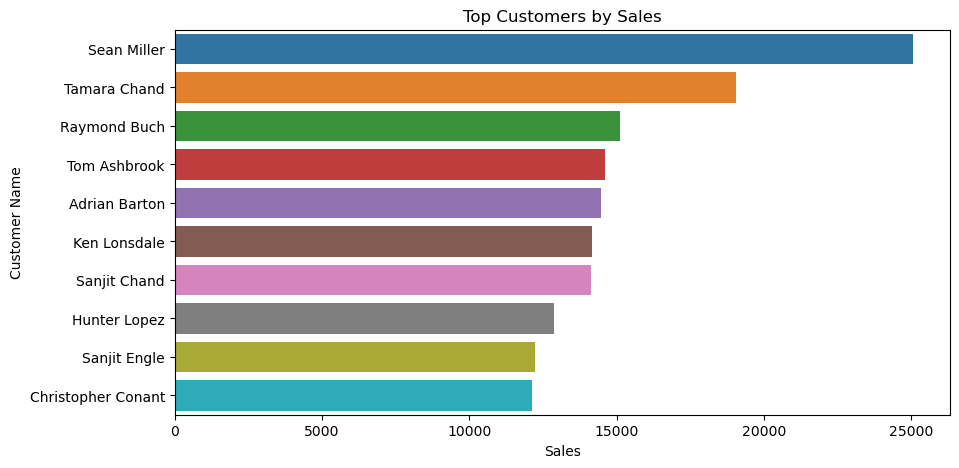

In [63]:
# Top customers by sales
top_customers = data.groupby('Customer Name').agg({'Sales': 'sum'}).sort_values(by='Sales', ascending=False).head(10).reset_index()
plt.figure(figsize=(10, 5))
sns.barplot(data=top_customers, x='Sales', y='Customer Name')
plt.title('Top Customers by Sales')
plt.show()

### Geographical Analysis

- Analyze sales distribution across different regions, states, and cities.



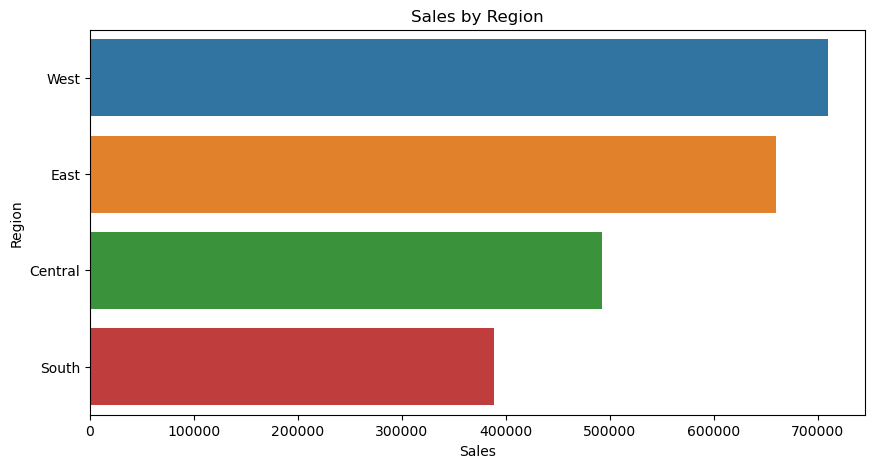

In [64]:
# Sales by region
region_sales = data.groupby('Region').agg({'Sales': 'sum'}).sort_values(by='Sales', ascending=False).reset_index()
plt.figure(figsize=(10, 5))
sns.barplot(data=region_sales, x='Sales', y='Region')
plt.title('Sales by Region')
plt.show()

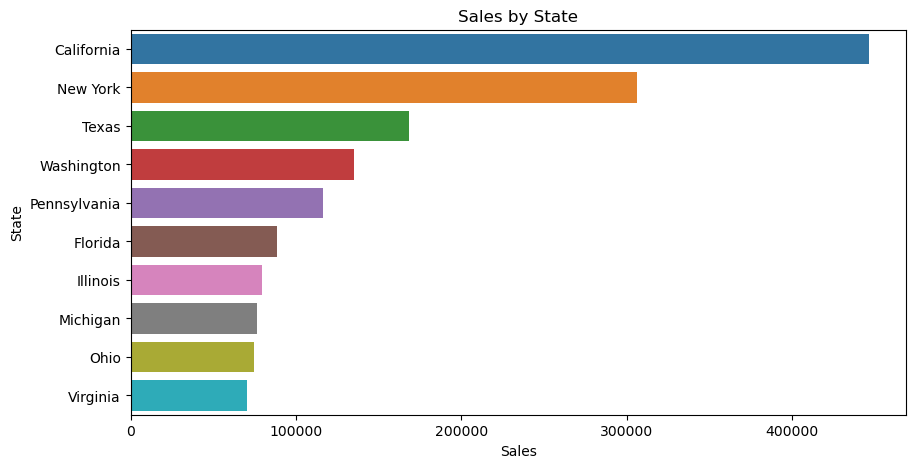

In [65]:
# Sales by state
state_sales = data.groupby('State').agg({'Sales': 'sum'}).sort_values(by='Sales', ascending=False).head(10).reset_index()
plt.figure(figsize=(10, 5))
sns.barplot(data=state_sales, x='Sales', y='State')
plt.title('Sales by State')
plt.show()

### Additional Analysis

- Analyze Sales by Segment
- Analyze Sales by Ship Mode

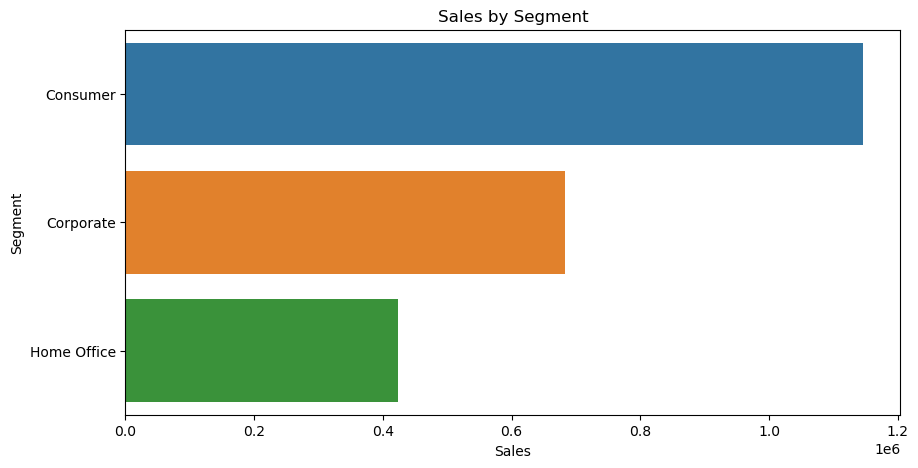

In [66]:
# Sales by Segment
segment_sales = data.groupby('Segment').agg({'Sales': 'sum'}).sort_values(by='Sales', ascending=False).reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(data=segment_sales, x='Sales', y='Segment')
plt.title('Sales by Segment')
plt.show()


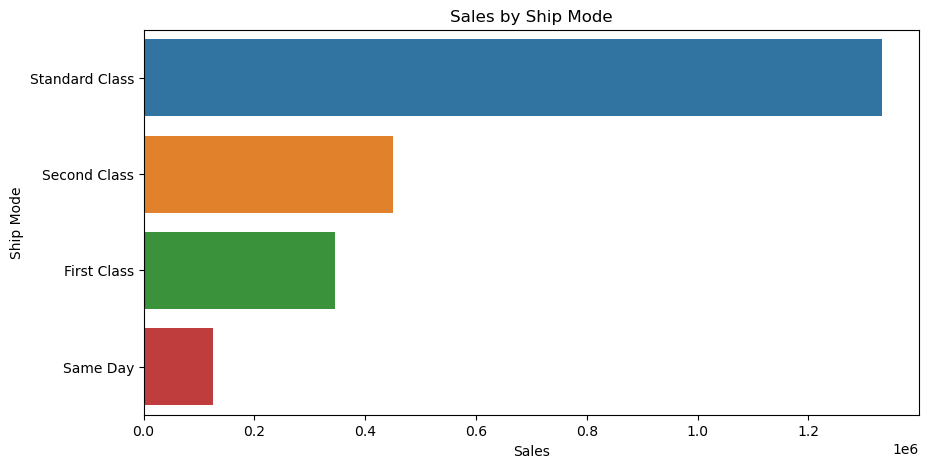

In [67]:
# Sales by Ship Mode
ship_mode_sales = data.groupby('Ship Mode').agg({'Sales': 'sum'}).sort_values(by='Sales', ascending=False).reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(data=ship_mode_sales, x='Sales', y='Ship Mode')
plt.title('Sales by Ship Mode')
plt.show()


## Other